In [847]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

hotels = pd.read_csv('hotels.csv')

In [848]:
hotels.head()

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,51.521009,-0.123097
2,151 bis Rue de Rennes 6th arr 75006 Paris France,32,10/18/2016,8.9,Legend Saint Germain by Elegancia,China,No kettle in room,6,406,No Positive,0,14,7.5,"[' Leisure trip ', ' Solo traveler ', ' Modern...",289 day,48.845377,2.325643
3,216 Avenue Jean Jaures 19th arr 75019 Paris Fr...,34,9/22/2015,7.5,Mercure Paris 19 Philharmonie La Villette,United Kingdom,No Negative,0,607,Friendly staff quiet comfortable room spotles...,11,8,10.0,"[' Leisure trip ', ' Solo traveler ', ' Standa...",681 day,48.888697,2.394540
4,Molenwerf 1 1014 AG Amsterdam Netherlands,914,3/5/2016,8.5,Golden Tulip Amsterdam West,Poland,Torn sheets,4,7586,The staff was very friendly and helpful Break...,20,10,9.6,"[' Business trip ', ' Couple ', ' Standard Dou...",516 day,52.385601,4.847060


In [849]:
hotels = hotels.drop_duplicates() ##dropping duplicates

## Working with Data - extracting day of week (weekend or business day)

In [850]:
hotels['review_date'] = pd.to_datetime(hotels['review_date'])
hotels['weekday'] = hotels['review_date'].dt.dayofweek
hotels['weekday'] = hotels['weekday'].apply(lambda x: 1 if x==5 or x==6 else 0)

In [851]:
#checking the weekdays
hotels['weekday'].value_counts()

0    284610
1    101886
Name: weekday, dtype: int64

## Tags processing

In [852]:
import string

In [853]:
hotels['tags'] = hotels['tags'].str.split(',')

def trans_strip(argument):
    
    output_list = []
    
    for item in argument:
        item = item.translate(str.maketrans('','', string.punctuation))
        output_list.append(item.strip())
        
    return output_list

hotels['tags'] = hotels['tags'].apply(trans_strip)


In [854]:
hotels['tags']

0         [Leisure trip, Couple, Studio Suite, Stayed 2 ...
1         [Business trip, Couple, Standard Double Room, ...
2         [Leisure trip, Solo traveler, Modern Double Ro...
3         [Leisure trip, Solo traveler, Standard Room wi...
4         [Business trip, Couple, Standard Double or Twi...
                                ...                        
386798    [Leisure trip, Group, Club Double or Twin Room...
386799    [Leisure trip, Couple, Standard Double Room, S...
386800    [Business trip, Solo traveler, Single Room, St...
386801    [Leisure trip, Solo traveler, Deluxe Double Ro...
386802    [Leisure trip, Couple, Bunk Bed Room, Stayed 4...
Name: tags, Length: 386496, dtype: object

In [855]:

# creating pre-defined features
trip_type = ['Leisure trip',
             'Business trip']

family_type =['Couple',
              'Group',
              'Solo traveler',
              'Family with older children',
              'Family with young children']

room_related = ['Double',
             'Queen',
             'Standard',
             'Room',
             'Suite',
             'Deluxe',
             'King',
             'Superior']


def split_tags(tag):
    
    """ The function is intended to extract some pre-defined features from tags

    Args:
        tag (string): tags from the hotels dataframe
    
    Returns:
        output_list (list): list of features extracted from tags
    """
    
    
    def get_nights(nights_string):
        
        nights_lilst = str(nights_string).split(sep=' ')
          
        return int(nights_lilst[1])
     
    output_list = [np.nan for i in range(6)]
    
    for item in tag:

        #checking trip type
        for sub_item in trip_type:
            
            if sub_item in item:
                output_list[1] = sub_item
        
        #checking family type
        for sub_item in family_type:
            
            if sub_item in item:
                output_list[2] = sub_item
        
        #checking room type
        for sub_item in room_related:
            
            if sub_item in item:
                output_list[3] = item
            
        if 'With a pet' in item:
            output_list[0] = 'With a pet'
        
        if 'Submitted from a mobile device' in item:
            output_list[5] = 'Submitted from a mobile device'
        
        if 'Stayed' in item:
            output_list[4] = get_nights(item)  #extracting number of nights
 
    return(output_list)


hotels['pets'] = hotels['tags'].apply(lambda x: 0 if split_tags(x)[0] is np.nan else 1)
hotels['trip_type'] = hotels['tags'].apply(lambda x: split_tags(x)[1])
hotels['family_type'] = hotels['tags'].apply(lambda x: split_tags(x)[2])
hotels['room_type'] = hotels['tags'].apply(lambda x: split_tags(x)[3])
hotels['nights'] = hotels['tags'].apply(lambda x: split_tags(x)[4])
hotels['mobile_used'] = hotels['tags'].apply(lambda x: 0 if split_tags(x)[5] is np.nan else 1)


## Creating new features

In [856]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 386496 entries, 0 to 386802
Data columns (total 24 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   hotel_address                               386496 non-null  object        
 1   additional_number_of_scoring                386496 non-null  int64         
 2   review_date                                 386496 non-null  datetime64[ns]
 3   average_score                               386496 non-null  float64       
 4   hotel_name                                  386496 non-null  object        
 5   reviewer_nationality                        386496 non-null  object        
 6   negative_review                             386496 non-null  object        
 7   review_total_negative_word_counts           386496 non-null  int64         
 8   total_number_of_reviews                     386496 non-null  int64        

In [857]:
hotels['positive_review'] = hotels['positive_review'].str.lower().str.strip()
hotels['negative_review'] = hotels['negative_review'].str.lower().str.strip()


In [858]:
pos_words =[]

for item in list(hotels['positive_review'].str.split(' ')):
    
    for sub_item in item:
        
        pos_words.append(sub_item)


pos_words_dict = dict()

for word in pos_words:
    
    if word in pos_words_dict.keys():
        pos_words_dict[word] +=1
        
    else:
        pos_words_dict[word] = 1

In [859]:
sr = pd.Series(pos_words_dict)
print(sr.sort_values(ascending=False).nlargest(20))

the          385546
and          315582
was          176963
staff        145772
very         144455
location     144442
to           140742
a            123479
room         105655
hotel         93933
in            85608
good          84421
of            79786
great         79090
is            76698
for           68443
were          68273
friendly      63825
breakfast     63277
helpful       57163
dtype: int64


In [861]:
sr = pd.Series(pos_words_dict)
sr.sort_values(ascending=False).nlargest(20)

top_6_pos_words = ['staff',
                   'location',
                   'room',
                   'hotel',
                   'breakfast',
                   'helpful']

In [862]:
neg_words =[]

for item in list(hotels['negative_review'].str.split(' ')):
    
    for sub_item in item:
        
        neg_words.append(sub_item)


neg_words_dict = dict()

for word in neg_words:
    
    if word in neg_words_dict.keys():
        neg_words_dict[word] +=1
        
    else:
        neg_words_dict[word] = 1

sr = pd.Series(neg_words_dict)

In [863]:
print(sr.sort_values(ascending=False).nlargest(100).index)

Index(['the', 'was', 'a', 'to', 'and', 'no', 'room', 'in', 'negative', 'not',
       'i', 'of', 'for', 'it', 'we', 'is', 'very', 'but', 'hotel', 't', 'on',
       'were', 'at', 'had', 'that', 'breakfast', 'have', 'with', 'small',
       'there', 'be', 'as', 'they', 'you', 'from', 'this', 'staff', 'so', 'my',
       'nothing', 'rooms', 'our', 'would', 'could', 'when', 'bed', 'are',
       'all', 'too', 'one', 'only', 'bit', 'out', 'bathroom', 'didn', 'which',
       'night', 'like', 'little', 'or', 'if', 'shower', 'good', 'an', 'been',
       'us', 'more', 'did', 'get', 'up', 'service', 'bar', 's', 'me', 'stay',
       'time', 'reception', 'expensive', 'really', 'also', 'just', 'some',
       'poor', 'even', 'price', 'by', 'check', 'day', 'floor', 'can', 'water',
       'wasn', '2', 'noisy', 'after', 'air', 'about', 'work', 'coffee',
       'other'],
      dtype='object')


In [864]:
top_6_neg_words = ['no',
                   'negative',
                   'not',
                   'breakfast',
                   'staff',
                   'nothing',
                   'shower',
                   'didn',
                   'noisy']

In [865]:
def pos_word_count(word):
    
    count = 0
    
    for item in top_6_pos_words:
        
        if item in word:
            count += 1
    
    return count
    
    
hotels['positive_words'] = hotels['positive_review'].apply(pos_word_count)

In [866]:
hotels['positive_words'].value_counts()

1    124584
2     90320
0     85291
3     54207
4     24172
5      6947
6       975
Name: positive_words, dtype: int64

In [867]:
def neg_word_count(word):
    
    count = 0
    
    for item in top_6_neg_words:
        
        if item in word:
            count += 1
    
    return count
    
    
hotels['negative_words'] = hotels['negative_review'].apply(neg_word_count)

In [868]:
hotels['negative_words'].value_counts()

2    154796
0    105350
1     62581
3     52816
4      9137
5      1607
6       190
7        17
8         2
Name: negative_words, dtype: int64

In [869]:
#from the dataframe we have determined the top cities and countries

city_list = ['London', 'Amsterdam', 'Barcelona', 'Paris', 'Milan', 'Vienna']
county_list = ['United Kingdom', 'France', 'Netherlands', 'Austria', 'Italy', 'Spain']

In [870]:
def get_city(df_arguemnt):
    
    city = 'Other'
    for item in city_list:
        if item in df_arguemnt:
            city = item
    
    return city

hotels['city'] = hotels['hotel_address'].apply(get_city)

def get_contry(df_arguemnt):
    
    country = 'Other'
    for item in county_list:
        if item in df_arguemnt:
            country = item
    
    return country

hotels['country'] = hotels['hotel_address'].apply(get_city)

In [871]:
def get_days(days_string) -> int:
    
    """ The function extracts interger value from string

    Args:
        days_string (object): from DataFrame

    Returns:
        int: number of days
    """
    days = str(days_string).split(sep=' ')[0]
    
    return int(days)

hotels['days_since_review'] = hotels['days_since_review'].apply(get_days)
hotels['days_since_review'] = hotels['days_since_review'].astype('int32')


## Cleaning missing values

In [872]:
hotels.info() #checking missing values in the new created features

<class 'pandas.core.frame.DataFrame'>
Int64Index: 386496 entries, 0 to 386802
Data columns (total 28 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   hotel_address                               386496 non-null  object        
 1   additional_number_of_scoring                386496 non-null  int64         
 2   review_date                                 386496 non-null  datetime64[ns]
 3   average_score                               386496 non-null  float64       
 4   hotel_name                                  386496 non-null  object        
 5   reviewer_nationality                        386496 non-null  object        
 6   negative_review                             386496 non-null  object        
 7   review_total_negative_word_counts           386496 non-null  int64         
 8   total_number_of_reviews                     386496 non-null  int64        

In [873]:
#checking missing values in the new created features

isnull_df = hotels.isnull().mean()*100
print(isnull_df.sort_values(ascending=False))

room_type                                     3.337421
trip_type                                     2.900159
lng                                           0.633383
lat                                           0.633383
family_type                                   0.421738
nights                                        0.037775
hotel_address                                 0.000000
additional_number_of_scoring                  0.000000
city                                          0.000000
negative_words                                0.000000
positive_words                                0.000000
mobile_used                                   0.000000
pets                                          0.000000
weekday                                       0.000000
days_since_review                             0.000000
tags                                          0.000000
reviewer_score                                0.000000
total_number_of_reviews_reviewer_has_given    0.000000
review_tot

In [874]:
# I mentioned that "lng" has negative values (about 50 % of the records)
# I have a feeling that Longtitude will not play any significan role as a feature
# But I supposed that this is just a typo, so I have decided  to convert it to positive first

hotels['lng'] = abs(hotels['lng'])
print(hotels['lng'].describe())


count    384048.000000
mean          2.966975
std           4.489336
min           0.000250
25%           0.141476
50%           0.283526
75%           4.834443
max          16.429233
Name: lng, dtype: float64


In [875]:
top20_rooms = hotels['room_type'].value_counts().nlargest(n=20).index

In [876]:
hotels['room_type'] = hotels['room_type'].apply(lambda x: x if x in top20_rooms else 'Other')

In [877]:
# here I am going to fill the missing data with mean values


values = {'lat' : hotels['lat'].mean(),
          'lng' : hotels['lng'].mean(),
          'nights' : hotels['nights'].mean(),
          'trip_type' : hotels['trip_type'].value_counts(ascending=False).index[0],
          'family_type' : hotels['family_type'].value_counts(ascending=False).index[0]}

hotels = hotels.fillna(value=values)

In [878]:
# check missing values once again

isnull_df = hotels.isnull().mean()*100
print(isnull_df.sort_values(ascending=False))

hotel_address                                 0.0
additional_number_of_scoring                  0.0
city                                          0.0
negative_words                                0.0
positive_words                                0.0
mobile_used                                   0.0
nights                                        0.0
room_type                                     0.0
family_type                                   0.0
trip_type                                     0.0
pets                                          0.0
weekday                                       0.0
lng                                           0.0
lat                                           0.0
days_since_review                             0.0
tags                                          0.0
reviewer_score                                0.0
total_number_of_reviews_reviewer_has_given    0.0
review_total_positive_word_counts             0.0
positive_review                               0.0


In [879]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 386496 entries, 0 to 386802
Data columns (total 28 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   hotel_address                               386496 non-null  object        
 1   additional_number_of_scoring                386496 non-null  int64         
 2   review_date                                 386496 non-null  datetime64[ns]
 3   average_score                               386496 non-null  float64       
 4   hotel_name                                  386496 non-null  object        
 5   reviewer_nationality                        386496 non-null  object        
 6   negative_review                             386496 non-null  object        
 7   review_total_negative_word_counts           386496 non-null  int64         
 8   total_number_of_reviews                     386496 non-null  int64        

## Cleaning from outliers

In this part I am going to clean the DataFrame from outliers - for this purpose I will plot all int type data

In [880]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 386496 entries, 0 to 386802
Data columns (total 28 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   hotel_address                               386496 non-null  object        
 1   additional_number_of_scoring                386496 non-null  int64         
 2   review_date                                 386496 non-null  datetime64[ns]
 3   average_score                               386496 non-null  float64       
 4   hotel_name                                  386496 non-null  object        
 5   reviewer_nationality                        386496 non-null  object        
 6   negative_review                             386496 non-null  object        
 7   review_total_negative_word_counts           386496 non-null  int64         
 8   total_number_of_reviews                     386496 non-null  int64        

## Features encoding

In [881]:
from sklearn import preprocessing

lab_encoder = preprocessing.LabelEncoder()

hotels_encoded = hotels.copy()

hotels_encoded['reviewer_nationality'] = lab_encoder.fit_transform(hotels_encoded['reviewer_nationality'])
hotels_encoded['trip_type'] = lab_encoder.fit_transform(hotels_encoded['trip_type'])
hotels_encoded['family_type'] = lab_encoder.fit_transform(hotels_encoded['family_type'])
hotels_encoded['room_type'] = lab_encoder.fit_transform(hotels_encoded['room_type'])
hotels_encoded['city'] = lab_encoder.fit_transform(hotels_encoded['city'])
hotels_encoded['country'] = lab_encoder.fit_transform(hotels_encoded['country'])



In [882]:
hotels_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 386496 entries, 0 to 386802
Data columns (total 28 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   hotel_address                               386496 non-null  object        
 1   additional_number_of_scoring                386496 non-null  int64         
 2   review_date                                 386496 non-null  datetime64[ns]
 3   average_score                               386496 non-null  float64       
 4   hotel_name                                  386496 non-null  object        
 5   reviewer_nationality                        386496 non-null  int64         
 6   negative_review                             386496 non-null  object        
 7   review_total_negative_word_counts           386496 non-null  int64         
 8   total_number_of_reviews                     386496 non-null  int64        

In [883]:
# Before normalization - drop nonimportant columns
hotels_encoded = hotels_encoded.drop(columns=['hotel_address',
                                              'review_date',
                                              'hotel_name',
                                              'negative_review',
                                              'positive_review',
                                              'tags',
                                              'lng',
                                              'lat'], axis=1)

In [884]:
hotels_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 386496 entries, 0 to 386802
Data columns (total 20 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   additional_number_of_scoring                386496 non-null  int64  
 1   average_score                               386496 non-null  float64
 2   reviewer_nationality                        386496 non-null  int64  
 3   review_total_negative_word_counts           386496 non-null  int64  
 4   total_number_of_reviews                     386496 non-null  int64  
 5   review_total_positive_word_counts           386496 non-null  int64  
 6   total_number_of_reviews_reviewer_has_given  386496 non-null  int64  
 7   reviewer_score                              386496 non-null  float64
 8   days_since_review                           386496 non-null  int32  
 9   weekday                                     386496 non-null  int64  
 

## Data normalization

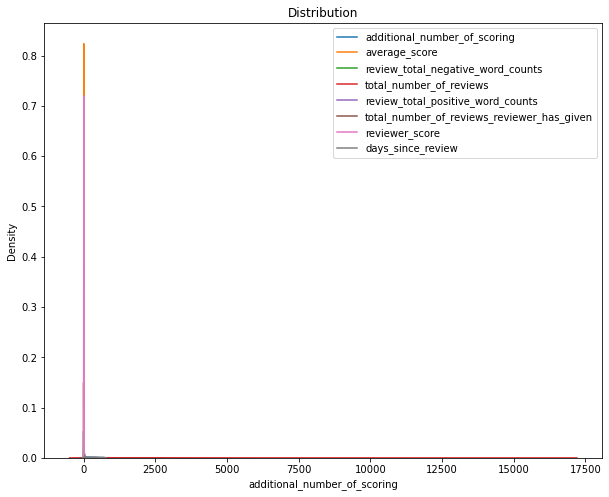

In [885]:
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Distribution')

sns.kdeplot(hotels_encoded['additional_number_of_scoring'], ax=ax1, label ='additional_number_of_scoring')
sns.kdeplot(hotels_encoded['average_score'], ax=ax1, label ='average_score')
sns.kdeplot(hotels_encoded['review_total_negative_word_counts'], ax=ax1, label ='review_total_negative_word_counts')
sns.kdeplot(hotels_encoded['total_number_of_reviews'], ax=ax1, label ='total_number_of_reviews')
sns.kdeplot(hotels_encoded['review_total_positive_word_counts'], ax=ax1, label ='review_total_positive_word_counts')
sns.kdeplot(hotels_encoded['total_number_of_reviews_reviewer_has_given'], ax=ax1, label ='total_number_of_reviews_reviewer_has_given')
sns.kdeplot(hotels_encoded['reviewer_score'], ax=ax1, label ='reviewer_score')
sns.kdeplot(hotels_encoded['days_since_review'], ax=ax1, label ='days_since_review')
#sns.kdeplot(hotels_encoded['lat'], ax=ax1, label ='lat')
#sns.kdeplot(hotels_encoded['lng'], ax=ax1, label ='lng')

plt.legend()

In [886]:
num_cols =['total_number_of_reviews',
           'review_total_negative_word_counts',
           'review_total_positive_word_counts',
           'total_number_of_reviews_reviewer_has_given',
           'nights',
           'additional_number_of_scoring',
           'average_score',
           'days_since_review',
           'negative_words',
           'positive_words']

In [887]:
cat_cols = ['reviewer_nationality',
            'weekday',
            'city',
            'country',
            'pets',
            'trip_type',
            'family_type',
            'room_type',
            'mobile_used',
            'reviewer_score']

In [888]:
from sklearn import preprocessing

col_names = list(hotels_encoded.columns)

r_scaler = preprocessing.RobustScaler()

hotels_encoded_norm = r_scaler.fit_transform(hotels_encoded[num_cols])

hotels_encoded[num_cols] = pd.DataFrame(hotels_encoded_norm)

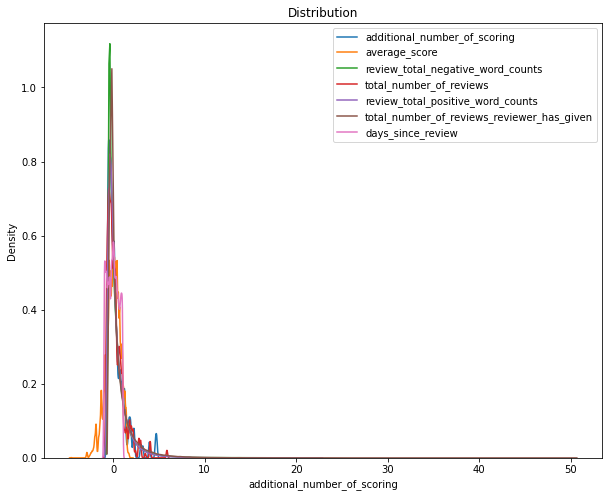

In [889]:
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Distribution')

sns.kdeplot(hotels_encoded['additional_number_of_scoring'], ax=ax1, label ='additional_number_of_scoring')
sns.kdeplot(hotels_encoded['average_score'], ax=ax1, label ='average_score')
sns.kdeplot(hotels_encoded['review_total_negative_word_counts'], ax=ax1, label ='review_total_negative_word_counts')
sns.kdeplot(hotels_encoded['total_number_of_reviews'], ax=ax1, label ='total_number_of_reviews')
sns.kdeplot(hotels_encoded['review_total_positive_word_counts'], ax=ax1, label ='review_total_positive_word_counts')
sns.kdeplot(hotels_encoded['total_number_of_reviews_reviewer_has_given'], ax=ax1, label ='total_number_of_reviews_reviewer_has_given')
#sns.kdeplot(hotels_encoded_norm['reviewer_score'], ax=ax1, label ='reviewer_score')
sns.kdeplot(hotels_encoded['days_since_review'], ax=ax1, label ='days_since_review')
#sns.kdeplot(hotels_encoded_norm['lat'], ax=ax1, label ='lat')
#sns.kdeplot(hotels_encoded_norm['lng'], ax=ax1, label ='lng')

plt.legend()

## Correlation test

<AxesSubplot:>

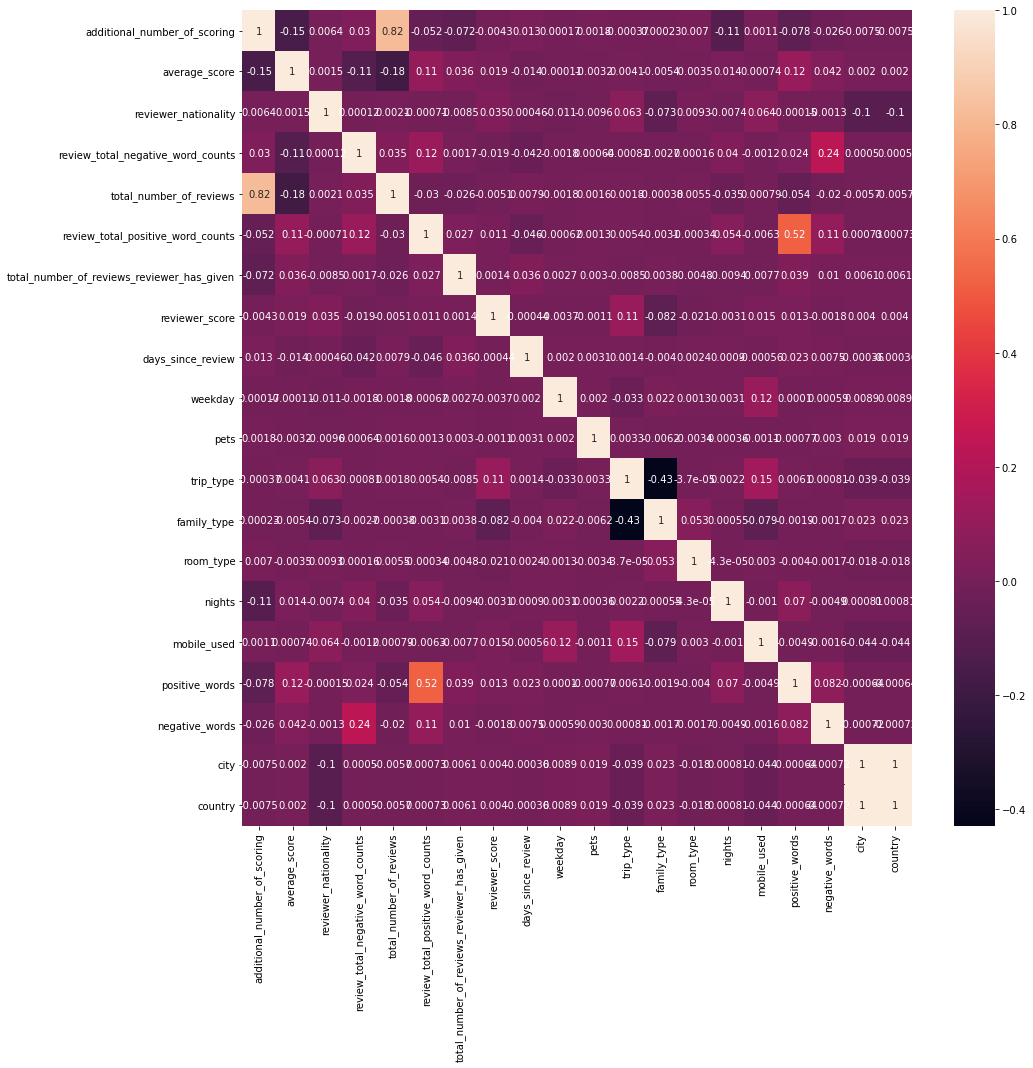

In [890]:
figure = plt.figure(figsize=(15,15))

sns.heatmap(data=hotels_encoded.corr(), annot=True)

In [891]:
hotels_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 386496 entries, 0 to 386802
Data columns (total 20 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   additional_number_of_scoring                386189 non-null  float64
 1   average_score                               386189 non-null  float64
 2   reviewer_nationality                        386496 non-null  int64  
 3   review_total_negative_word_counts           386189 non-null  float64
 4   total_number_of_reviews                     386189 non-null  float64
 5   review_total_positive_word_counts           386189 non-null  float64
 6   total_number_of_reviews_reviewer_has_given  386189 non-null  float64
 7   reviewer_score                              386496 non-null  float64
 8   days_since_review                           386189 non-null  float64
 9   weekday                                     386496 non-null  int64  
 

## Machine Learning

In [892]:
test_df = hotels_encoded.dropna(axis=0, how='any')

In [893]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 386189 entries, 0 to 386495
Data columns (total 20 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   additional_number_of_scoring                386189 non-null  float64
 1   average_score                               386189 non-null  float64
 2   reviewer_nationality                        386189 non-null  int64  
 3   review_total_negative_word_counts           386189 non-null  float64
 4   total_number_of_reviews                     386189 non-null  float64
 5   review_total_positive_word_counts           386189 non-null  float64
 6   total_number_of_reviews_reviewer_has_given  386189 non-null  float64
 7   reviewer_score                              386189 non-null  float64
 8   days_since_review                           386189 non-null  float64
 9   weekday                                     386189 non-null  int64  
 

In [836]:
#test_df = hotels_encoded.drop(columns=['additional_number_of_scoring', 'lat'],axis=1)

#test_df = hotels_encoded.copy()

In [837]:
X = test_df.drop(['reviewer_score'], axis = 1)  
y = test_df['reviewer_score']

<AxesSubplot:>

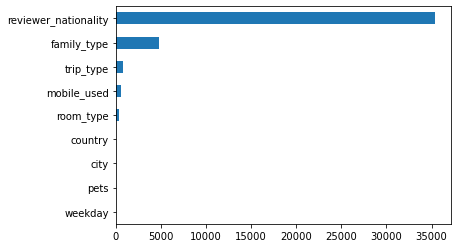

In [838]:
cat_cols = ['reviewer_nationality',
            'weekday',
            'city',
            'country',
            'pets',
            'trip_type',
            'family_type',
            'room_type',
            'mobile_used']

from sklearn.feature_selection import chi2 # хи-квадрат

y=y.astype('int')

imp_cat = pd.Series(chi2(X[cat_cols], y)[0], index=cat_cols)
imp_cat.sort_values(inplace = True)
imp_cat.plot(kind = 'barh')

In [839]:
num_cols =['total_number_of_reviews',
           'review_total_negative_word_counts',
           'review_total_positive_word_counts',
           'total_number_of_reviews_reviewer_has_given',
           'nights',
           'additional_number_of_scoring',
           'positive_words',
           'negative_words']

from sklearn.feature_selection import f_classif # anova

imp_num = pd.Series(f_classif(X[num_cols], y)[0], index = num_cols)
imp_num.sort_values(inplace = True)
imp_num.plot(kind = 'barh')

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [894]:
#test_df = hotels_encoded.copy()

test_df = test_df.drop(columns=['pets',
                                'country',
                                'pets',
                                'additional_number_of_scoring'])

In [895]:
X = test_df.drop(['reviewer_score'], axis = 1)  
y = test_df['reviewer_score']

In [896]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.25, random_state=42)

regr = RandomForestRegressor(n_estimators=100)  
      
regr.fit(X_tr, y_tr)  

y_pred = regr.predict(X_te)

print('MAPE:', metrics.mean_absolute_percentage_error(y_te, y_pred))

MAPE: 0.1920948647589085
